<a href="https://colab.research.google.com/github/Abhilash-Bee/DeepLearningCertification/blob/main/06_Transfer_Learning_in_TensorFlow_Part_3_Scaling_up_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🛠 06. Transfer Learning in TensorFlow Part 3: Scaling-up Exercises**

1. Take 3 of your own photos of food and use the trained model to make predictions on them, share your predictions with the other students in Discord and show off your Food Vision model 🍔👁.
2. Train a feature-extraction transfer learning model for 10 epochs on the same data and compare its performance versus a model which used feature extraction for 5 epochs and fine-tuning for 5 epochs (like we've used in this notebook). Which method is better?
3. Recreate the first model (the feature extraction model) with [`mixed_precision`](https://www.tensorflow.org/guide/mixed_precision) turned on.
  * Does it make the model train faster?
  * Does it effect the accuracy or performance of our model?
  * What's the advantages of using `mixed_precision` training?


---

---

## **0. Doing the stuffs of video part**

### Getting the helper function

In [1]:
!wget https://raw.githubusercontent.com/Abhilash-Bee/DeepLearningCertification/main/extras/helper_function.py

--2024-02-03 15:32:34--  https://raw.githubusercontent.com/Abhilash-Bee/DeepLearningCertification/main/extras/helper_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7952 (7.8K) [text/plain]
Saving to: ‘helper_function.py’

helper_function.py  100%[===================>]   7.77K  --.-KB/s    in 0s      

2024-02-03 15:32:34 (104 MB/s) - ‘helper_function.py’ saved [7952/7952]



### Importing Dependencies

In [74]:
import tensorflow as tf
import numpy as np
import pandas as pd
from helper_function import *

### Getting food vision 10 % of all the classes

In [3]:
path = tf.keras.utils.get_file(origin='https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip',
                               extract=True)[:-4]

train_dir = path + '/train/'
test_dir = path + '/test/'

In [4]:
!ls /root/.keras/datasets/

101_food_classes_10_percent  101_food_classes_10_percent.zip  __MACOSX


### Data Preprocessing - Getting train dataset and testdataset

In [5]:
IMG_SIZE = (224, 224)

train_data = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                 label_mode='categorical',
                                                                 image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                label_mode='categorical',
                                                                image_size=IMG_SIZE,
                                                                shuffle=False) # To predict and plot confusion matrix

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [6]:
class_names = train_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

### Plot the images

In [ ]:
plot_images

### Creating the base model **(EfficientNetB0)**

In [7]:
IMG_SHAPE = IMG_SIZE + (3,)

base_model = tf.keras.applications.efficientnet.EfficientNetB0(include_top=False)

base_model.trainable = False

16705208/16705208 [==============================] - 1s 0us/step


### Creating Data Augmentation

In [8]:
# data_augmentation = tf.keras.models.Sequential([
#     # tf.keras.layers.Rescaling(1/255.), # Can be rescaled if needed
#     tf.keras.layers.RandomRotation(0.2),
#     tf.keras.layers.RandomZoom(0.2),
#     tf.keras.layers.RandomFlip('horizontal'),
#     tf.keras.layers.RandomHeight(0.2),
#     tf.keras.layers.RandomWidth(0.2)
# ])

#### Getting error in two places, if included **Data Augmentation**

* One, while creating the model (Shape Error required 4 dims got 5 dims)
* Two, when loading the model after saving it (TypeError: Dimension value must be integer or None or have an __index__ method, got value '[None, 224, 224, 3]' with type '<class 'list'>')

### Creating our own model with base model

In [8]:
inputs = tf.keras.layers.Input(shape=IMG_SHAPE, name='Input_layer'),

# x = tf.squeeze(inputs)

# x = data_augmentation(x)

x = base_model(inputs, training=False)

x = tf.keras.layers.GlobalAveragePooling2D()(x)

outputs = tf.keras.layers.Dense(len(class_names), activation='softmax', name='Output_layer')(x)

model = tf.keras.Model(inputs, outputs)

### Layers of the model

In [9]:
for i, layer in enumerate(model.layers):
  print(i, layer.name, layer.trainable)

0 Input_layer True
1 efficientnetb0 False
2 global_average_pooling2d True
3 Output_layer True


### Base model (EfficientNetB0) layers

In [10]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 rescaling_1 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze False
39

### Compile the model

In [72]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

### Model Summary

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 Output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4178952 (15.94 MB)
Trainable params: 129381 (505.39 KB)
Non-trainable params: 4049571 (15.45 MB)
_________________________________________________________________


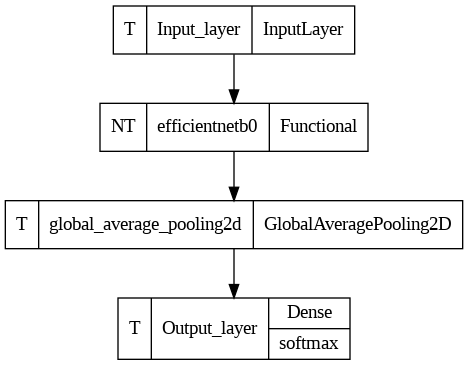

In [13]:
tf.keras.utils.plot_model(model, show_layer_activations=True, show_trainable=True)

In [14]:
len(model.trainable_variables)

2

### Fit the model

In [15]:
initial_epoch = 5

history_0 = model.fit(train_data,
                      epochs=initial_epoch,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=0.25 * len(test_data),
                      callbacks=[tensorflow_modelcheckpoint(directory='ModelCheckpoint',
                                                            experiment_name='feature_extraction'),
                                 tensorboard_callbacks(directory='Tensorboard',
                                                       experiment_name='feature_extraction')])

Path of the checkpoint: ModelCheckpoint/feature_extraction/20240203-125809
Saving the tensorboard callbacks in Tensorboard/feature_extraction/20240203-125809
Epoch 1/5
237/237 [==============================] - ETA: 0s - loss: 3.0733 - accuracy: 0.3446
Epoch 1: saving model to ModelCheckpoint/feature_extraction/20240203-125809
237/237 [==============================] - 44s 142ms/step - loss: 3.0733 - accuracy: 0.3446 - val_loss: 2.2508 - val_accuracy: 0.5008
Epoch 2/5
237/237 [==============================] - ETA: 0s - loss: 1.7499 - accuracy: 0.6141
Epoch 2: saving model to ModelCheckpoint/feature_extraction/20240203-125809
237/237 [==============================] - 31s 128ms/step - loss: 1.7499 - accuracy: 0.6141 - val_loss: 1.8834 - val_accuracy: 0.5292
Epoch 3/5
236/237 [============================>.] - ETA: 0s - loss: 1.3470 - accuracy: 0.6912
Epoch 3: saving model to ModelCheckpoint/feature_extraction/20240203-125809
237/237 [==============================] - 31s 127ms/step - l

### Evaluate the model

In [16]:
feature_extraction_model_evaluation = model.evaluate(test_data)

790/790 [==============================] - 57s 72ms/step - loss: 1.4210 - accuracy: 0.6255


### Plot loss and accuracy curve

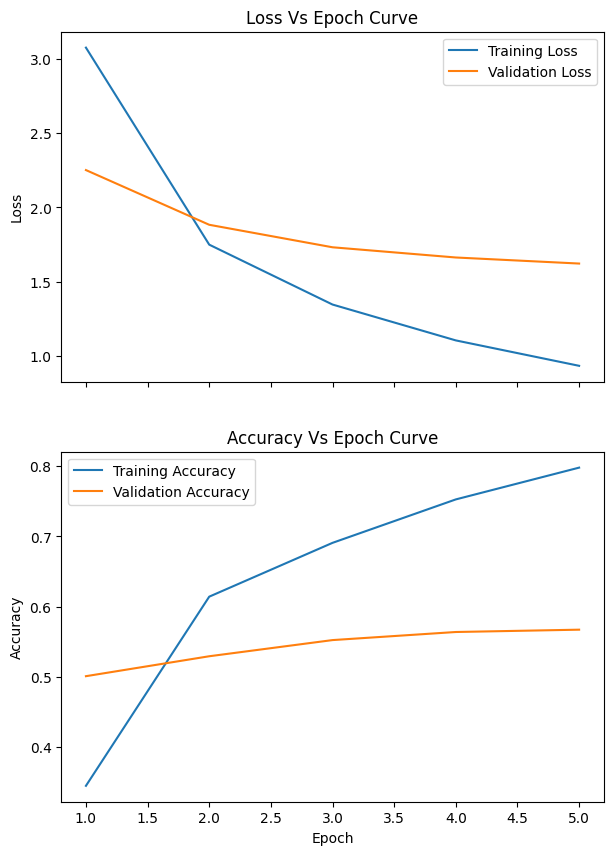

In [19]:
plot_loss_accuracy_curve(history=history_0)

### Saving Feature Extraction model

In [17]:
model.save('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/EfficientNetB0_Feature_model_Foodall10per.keras')

### Loading the Feature Extraction saved model

In [21]:
saved_model_feature_extraction = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/EfficientNetB0_Feature_model_Foodall10per.keras')

### Evaluate the saved feature extraction model

In [23]:
saved_model_feature_extraction.evaluate(test_data)

790/790 [==============================] - 61s 73ms/step - loss: 1.4210 - accuracy: 0.6255


[1.4210011959075928, 0.6255049705505371]

## Fine Tuning our model

### Setting base model to `True`

In [75]:
base_model.trainable = True

### Disable all layers to `False` except last 20 layers

In [76]:
for layer in base_model.layers[:-5]:
  layer.trainable = False

### Checking the model layers now

In [77]:
for layer in base_model.layers[-10:]:
  print(layer.name, layer.trainable)

block7a_se_squeeze False
block7a_se_reshape False
block7a_se_reduce False
block7a_se_expand False
block7a_se_excite False
block7a_project_conv True
block7a_project_bn True
top_conv True
top_bn True
top_activation True


### Compiling the model

In [78]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

### Model Summary

In [79]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional  (None, None, None, 1280   4049571   
 )                           )                                   
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 Output_layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 4178952 (15.94 MB)
Trainable params: 910821 (3.47 MB)
Non-trainable params: 3268131 (12.47 MB)
_________________________________________________________________


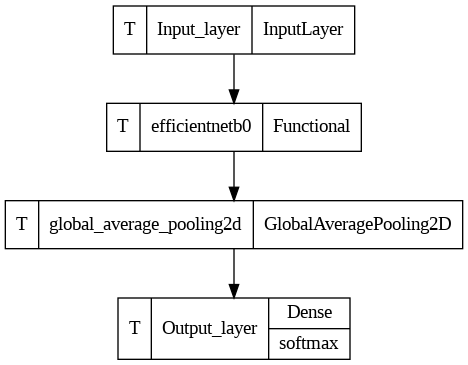

In [80]:
tf.keras.utils.plot_model(model, show_layer_activations=True, show_trainable=True)

In [81]:
len(model.trainable_variables)

8

### Fit the model

In [82]:
total_epochs = initial_epoch + 5

history_1 = model.fit(train_data,
                      epochs=total_epochs,
                      validation_data=test_data,
                      validation_steps=0.15 * len(test_data),
                      initial_epoch=history_0.epoch[-1],
                      callbacks=[tensorboard_callbacks(directory='Tensorboard',
                                                       experiment_name='fune_tuned_5_layers'),
                                 tensorflow_modelcheckpoint(directory='ModelCheckpoint',
                                                            experiment_name='fune_tuned_5_layers')])

Saving the tensorboard callbacks in Tensorboard/fune_tuned_5_layers/20240203-134419
Path of the checkpoint: ModelCheckpoint/fune_tuned_5_layers/20240203-134419
Epoch 5/10
237/237 [==============================] - ETA: 0s - loss: 0.6858 - accuracy: 0.8370
Epoch 5: saving model to ModelCheckpoint/fune_tuned_5_layers/20240203-134419
237/237 [==============================] - 38s 114ms/step - loss: 0.6858 - accuracy: 0.8370 - val_loss: 1.6396 - val_accuracy: 0.5704
Epoch 6/10
237/237 [==============================] - ETA: 0s - loss: 0.5548 - accuracy: 0.8700
Epoch 6: saving model to ModelCheckpoint/fune_tuned_5_layers/20240203-134419
237/237 [==============================] - 26s 109ms/step - loss: 0.5548 - accuracy: 0.8700 - val_loss: 1.6727 - val_accuracy: 0.5641
Epoch 7/10
237/237 [==============================] - ETA: 0s - loss: 0.4667 - accuracy: 0.8945
Epoch 7: saving model to ModelCheckpoint/fune_tuned_5_layers/20240203-134419
237/237 [==============================] - 28s 117ms/

### Evaluate the model

In [83]:
fune_tuned_evaluation = model.evaluate(test_data)

790/790 [==============================] - 60s 76ms/step - loss: 1.4429 - accuracy: 0.6331


In [84]:
feature_extraction_model_evaluation, fune_tuned_evaluation

([1.4210011959075928, 0.6255049705505371],
 [1.44293212890625, 0.6330693364143372])

### Compare histories

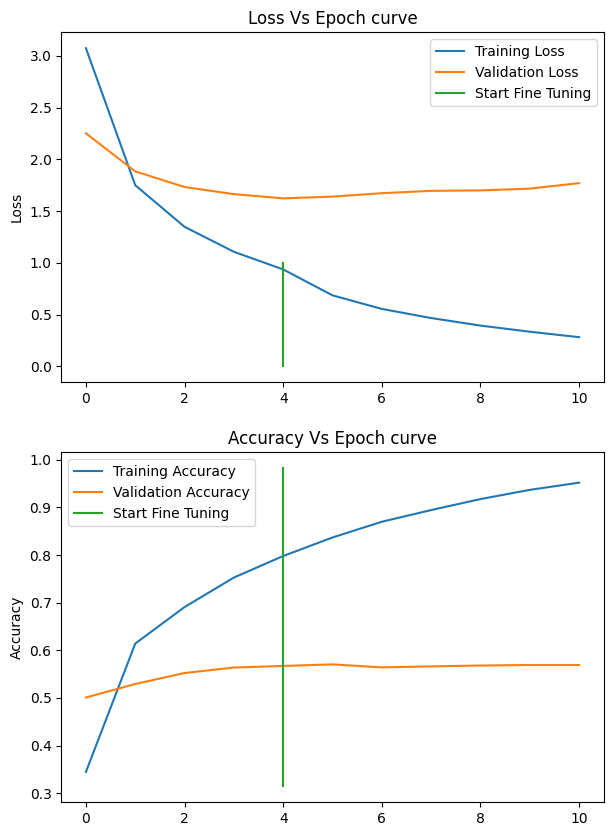

In [85]:
compare_histories(history_0, history_1)

### Save the model

In [86]:
model.save('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/EfficientNetB0_FineTuned_allfood10per.keras')

### Load the saved model

In [7]:
saved_model_fine_tuned = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DeepLearning/BestModel/EfficientNetB0_FineTuned_allfood10per.keras')

### Evaluate the saved model

In [38]:
saved_model_fine_tunded_evaluation = saved_model_fine_tuned.evaluate(test_data)

790/790 [==============================] - 76s 93ms/step - loss: 1.4429 - accuracy: 0.6331


### Plot the image with the model prediction

In [ ]:
pred_and_plot(saved_model_fine_tuned, list(test_data.as_numpy_iterator()), class_names=class_names)

### Get the labels from the test dataset

In [33]:
y_true = []
for images, labels in test_data.take(len(test_data)):
  for label in labels:
    y_true.append(label.numpy())

In [30]:
print(y_true[:2])

[array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32), array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)]


In [34]:
y_true = tf.argmax(y_true, axis=1).numpy()
y_true

array([  0,   0,   0, ..., 100, 100, 100])

### Predict the test dataset

In [45]:
y_prob = saved_model_fine_tuned.predict(test_data)
y_prob[:5]

790/790 [==============================] - 68s 86ms/step


array([[5.46332896e-01, 4.85183364e-06, 2.24049855e-02, 1.03464757e-08,
        1.71391741e-06, 3.58451672e-07, 3.60194713e-06, 8.31195806e-08,
        1.67900827e-02, 8.87018250e-05, 4.91408173e-07, 4.75590099e-07,
        3.01142602e-04, 5.00930462e-08, 2.30079959e-03, 2.20674020e-03,
        1.94037621e-05, 6.45507243e-05, 9.94992559e-04, 1.20404127e-06,
        1.60271535e-04, 2.09847531e-05, 4.53504545e-05, 2.43676823e-05,
        1.33912207e-03, 2.31123602e-04, 3.28663155e-03, 2.63122274e-06,
        3.32375504e-02, 8.88667637e-05, 5.99408395e-06, 2.40449270e-04,
        2.58229731e-04, 7.88867816e-09, 4.18142939e-04, 2.28357834e-07,
        3.39301150e-05, 4.57537943e-04, 7.02420389e-03, 3.44567641e-04,
        2.88076641e-04, 3.92949092e-04, 6.11882933e-05, 2.44368812e-06,
        1.94696127e-04, 1.12099842e-05, 5.91392309e-05, 2.95669929e-06,
        5.16905345e-07, 1.89201981e-01, 2.27171317e-04, 4.70754776e-06,
        9.17748064e-02, 1.75163860e-03, 7.10404447e-06, 7.645081

In [46]:
y_pred = tf.argmax(y_prob, axis=1).numpy()
y_pred

array([  0,   0,   0, ..., 100, 100, 100])

### Checking whether predicted labels and test labels are same

In [47]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_true=y_true, y_pred=y_pred)
score

0.6330693069306931

In [39]:
saved_model_fine_tunded_evaluation[1]

0.6330693364143372

In [48]:
np.isclose(score, saved_model_fine_tunded_evaluation[1])

True

### Plotting confusion matrix

In [49]:
plot_confusion_matrix(y_true=y_true, y_pred=y_pred, class_names=class_names, figsize=(200, 200))

### Classification Report

In [51]:
from sklearn.metrics import classification_report

results = classification_report(y_true=y_true, y_pred=y_pred)
print(results)

              precision    recall  f1-score   support

           0       0.33      0.27      0.30       250
           1       0.66      0.61      0.63       250
           2       0.66      0.69      0.67       250
           3       0.64      0.67      0.65       250
           4       0.49      0.53      0.51       250
           5       0.56      0.43      0.49       250
           6       0.81      0.75      0.78       250
           7       0.75      0.87      0.80       250
           8       0.34      0.40      0.37       250
           9       0.53      0.58      0.55       250
          10       0.61      0.45      0.52       250
          11       0.85      0.54      0.66       250
          12       0.76      0.62      0.68       250
          13       0.63      0.56      0.60       250
          14       0.54      0.60      0.57       250
          15       0.38      0.41      0.39       250
          16       0.68      0.58      0.62       250
          17       0.44    

In [53]:
output_dict = classification_report(y_true=y_true, y_pred=y_pred, output_dict=True)
print(output_dict)

{'0': {'precision': 0.3284313725490196, 'recall': 0.268, 'f1-score': 0.29515418502202645, 'support': 250}, '1': {'precision': 0.6566523605150214, 'recall': 0.612, 'f1-score': 0.6335403726708074, 'support': 250}, '2': {'precision': 0.6564885496183206, 'recall': 0.688, 'f1-score': 0.671875, 'support': 250}, '3': {'precision': 0.6423076923076924, 'recall': 0.668, 'f1-score': 0.6549019607843137, 'support': 250}, '4': {'precision': 0.4925373134328358, 'recall': 0.528, 'f1-score': 0.5096525096525097, 'support': 250}, '5': {'precision': 0.5631578947368421, 'recall': 0.428, 'f1-score': 0.4863636363636364, 'support': 250}, '6': {'precision': 0.8095238095238095, 'recall': 0.748, 'f1-score': 0.7775467775467776, 'support': 250}, '7': {'precision': 0.7457044673539519, 'recall': 0.868, 'f1-score': 0.8022181146025879, 'support': 250}, '8': {'precision': 0.34121621621621623, 'recall': 0.404, 'f1-score': 0.36996336996337004, 'support': 250}, '9': {'precision': 0.5291970802919708, 'recall': 0.58, 'f1-sc

In [68]:
print(output_dict['0']['f1-score'])

0.29515418502202645


In [98]:
f1_score = {}

for key, value in output_dict.items():
  if key == 'accuracy':
    break
  else:
    f1_score[class_names[int(key)]] = round(value['f1-score'] * 100, 2)

f1_score

{'apple_pie': 29.52,
 'baby_back_ribs': 63.35,
 'baklava': 67.19,
 'beef_carpaccio': 65.49,
 'beef_tartare': 50.97,
 'beet_salad': 48.64,
 'beignets': 77.75,
 'bibimbap': 80.22,
 'bread_pudding': 37.0,
 'breakfast_burrito': 55.34,
 'bruschetta': 51.83,
 'caesar_salad': 65.69,
 'cannoli': 67.99,
 'caprese_salad': 59.62,
 'carrot_cake': 56.6,
 'ceviche': 39.31,
 'cheese_plate': 62.34,
 'cheesecake': 40.26,
 'chicken_curry': 50.76,
 'chicken_quesadilla': 67.91,
 'chicken_wings': 74.06,
 'chocolate_cake': 48.45,
 'chocolate_mousse': 39.34,
 'churros': 76.08,
 'clam_chowder': 72.69,
 'club_sandwich': 71.26,
 'crab_cakes': 45.86,
 'creme_brulee': 74.02,
 'croque_madame': 68.31,
 'cup_cakes': 73.2,
 'deviled_eggs': 66.67,
 'donuts': 73.81,
 'dumplings': 80.68,
 'edamame': 97.15,
 'eggs_benedict': 74.23,
 'escargots': 72.12,
 'falafel': 51.81,
 'filet_mignon': 45.9,
 'fish_and_chips': 70.37,
 'foie_gras': 42.72,
 'french_fries': 77.41,
 'french_onion_soup': 69.81,
 'french_toast': 54.13,
 'fri

### f1-score DataFrame

In [99]:
f1_score_df = pd.DataFrame({'Food Names': f1_score.keys(),
                            'f1-score': f1_score.values()})

f1_score_df.sort_values('f1-score', ascending=False)[:10]

,Food Names,f1-score
33,edamame,97.15
63,macarons,90.06
69,oysters,86.63
75,pho,86.29
54,hot_and_sour_soup,85.37
51,guacamole,85.20
91,spaghetti_carbonara,83.87
64,miso_soup,83.54
68,onion_rings,82.25
45,frozen_yogurt,81.67


### Visualize f1-score

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

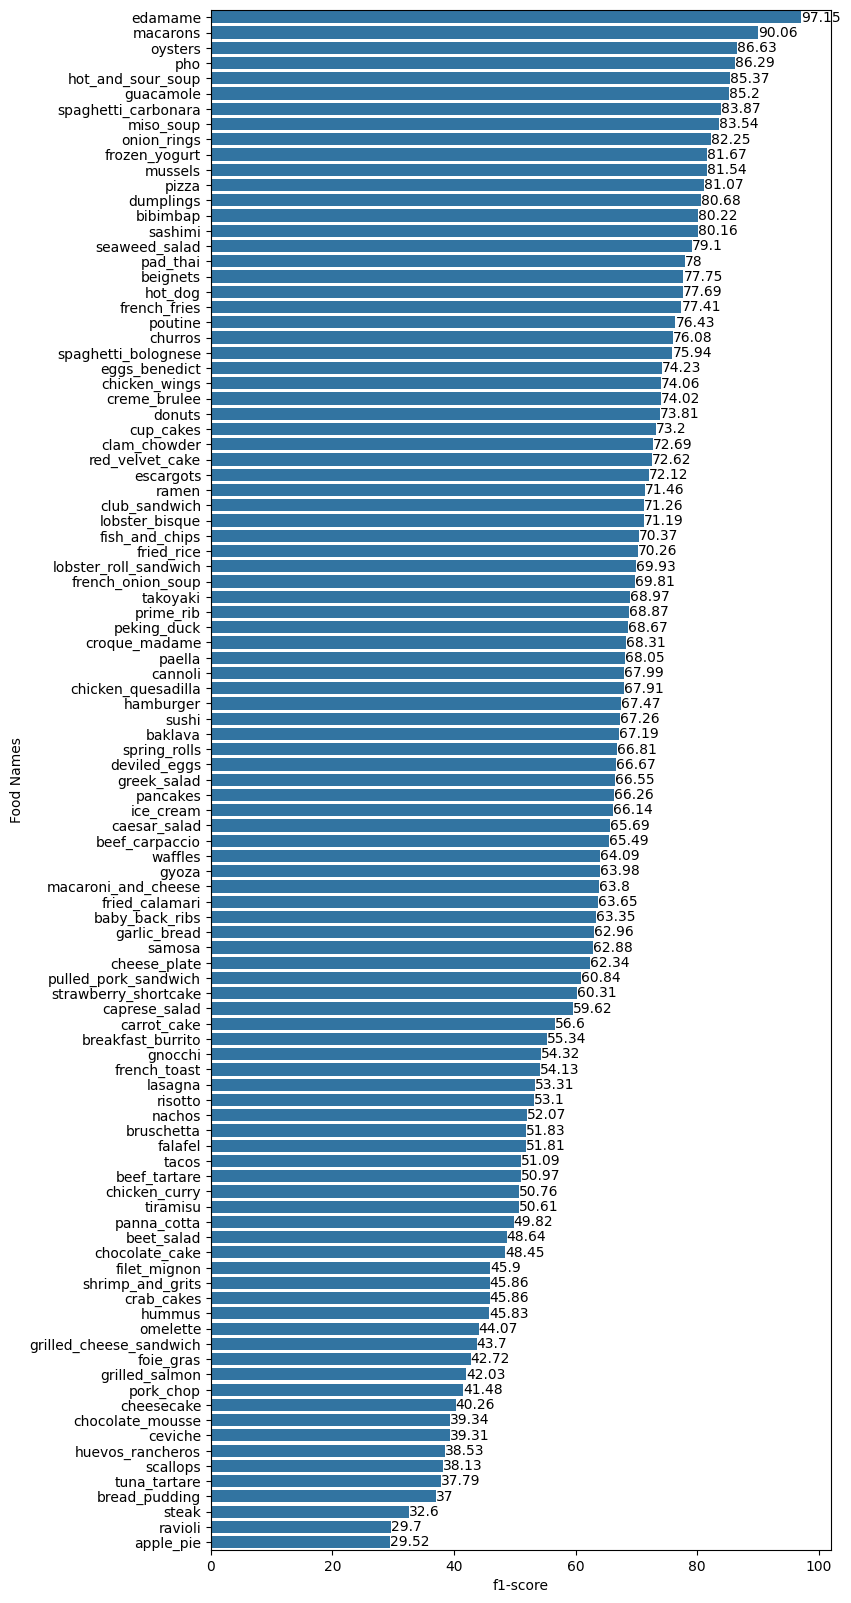

In [101]:
fig, ax = plt.subplots(figsize=(8, 20))
sns.barplot(data=f1_score_df.sort_values('f1-score', ascending=False),
            x='f1-score',
            y='Food Names')
ax.bar_label(ax.containers[0]);

### Saving data into DataFrame for further preprocessing

In [50]:
image_paths = test_data.file_paths
image_paths[:10]

['/root/.keras/datasets/101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 '/root/.keras/datasets/101_food_classes_10_percent/test/apple_pie/101251.jpg',
 '/root/.keras/datasets/101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 '/root/.keras/datasets/101_food_classes_10_percent/test/apple_pie/103801.jpg',
 '/root/.keras/datasets/101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 '/root/.keras/datasets/101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 '/root/.keras/datasets/101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 '/root/.keras/datasets/101_food_classes_10_percent/test/apple_pie/110043.jpg',
 '/root/.keras/datasets/101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 '/root/.keras/datasets/101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [106]:
data = {
    'Image Path': test_data.file_paths,
    'y_true': y_true,
    'y_pred': y_pred,
    'Prediction Probability': np.round(tf.reduce_max(y_prob, axis=1).numpy() * 100, 2),
    'True Labels': [class_names[i] for i in y_true],
    'Predictions': [class_names[i] for i in y_pred],
}

### Creating the Pandas DataFrame

In [108]:
food_vision_df = pd.DataFrame(data)

food_vision_df[:5]

,Image Path,y_true,y_pred,Prediction Probability,True Labels,Predictions
0,/root/.keras/datasets/101_food_classes_10_perc...,0,0,54.630001,apple_pie,apple_pie
1,/root/.keras/datasets/101_food_classes_10_perc...,0,0,82.730003,apple_pie,apple_pie
2,/root/.keras/datasets/101_food_classes_10_perc...,0,0,81.589996,apple_pie,apple_pie
3,/root/.keras/datasets/101_food_classes_10_perc...,0,0,31.580000,apple_pie,apple_pie
4,/root/.keras/datasets/101_food_classes_10_perc...,0,87,32.150002,apple_pie,scallops


In [109]:
food_vision_df['Correct Predictions'] = food_vision_df['y_true'] == food_vision_df['y_pred']

food_vision_df[:5]

,Image Path,y_true,y_pred,Prediction Probability,True Labels,Predictions,Correct Predictions
0,/root/.keras/datasets/101_food_classes_10_perc...,0,0,54.630001,apple_pie,apple_pie,True
1,/root/.keras/datasets/101_food_classes_10_perc...,0,0,82.730003,apple_pie,apple_pie,True
2,/root/.keras/datasets/101_food_classes_10_perc...,0,0,81.589996,apple_pie,apple_pie,True
3,/root/.keras/datasets/101_food_classes_10_perc...,0,0,31.580000,apple_pie,apple_pie,True
4,/root/.keras/datasets/101_food_classes_10_perc...,0,87,32.150002,apple_pie,scallops,False


### Highest prediction probability whose predictions are wrong

In [111]:
food_vision_df_hpp_wrong = food_vision_df[food_vision_df['Correct Predictions'] == False].sort_values('Prediction Probability',
                                                                                                      ascending=False)

food_vision_df_hpp_wrong[:10]

,Image Path,y_true,y_pred,Prediction Probability,True Labels,Predictions,Correct Predictions
11642,/root/.keras/datasets/101_food_classes_10_perc...,46,10,99.940002,garlic_bread,bruschetta,False
191,/root/.keras/datasets/101_food_classes_10_perc...,0,31,99.930000,apple_pie,donuts,False
22284,/root/.keras/datasets/101_food_classes_10_perc...,89,84,99.900002,shrimp_and_grits,risotto,False
10690,/root/.keras/datasets/101_food_classes_10_perc...,42,6,99.900002,french_toast,beignets,False
24856,/root/.keras/datasets/101_food_classes_10_perc...,99,94,99.870003,tuna_tartare,strawberry_shortcake,False
10013,/root/.keras/datasets/101_food_classes_10_perc...,40,43,99.830002,french_fries,fried_calamari,False
14482,/root/.keras/datasets/101_food_classes_10_perc...,57,51,99.800003,hummus,guacamole,False
6108,/root/.keras/datasets/101_food_classes_10_perc...,24,27,99.769997,clam_chowder,creme_brulee,False
10880,/root/.keras/datasets/101_food_classes_10_perc...,43,68,99.769997,fried_calamari,onion_rings,False
2654,/root/.keras/datasets/101_food_classes_10_perc...,10,76,99.750000,bruschetta,pizza,False


---

---

## **1. Take 3 of your own photos of food and use the trained model to make predictions on them, share your predictions with the other students in Discord and show off your Food Vision model 🍔👁.**

---

---

## **2. Train a feature-extraction transfer learning model for 10 epochs on the same data and compare its performance versus a model which used feature extraction for 5 epochs and fine-tuning for 5 epochs (like we've used in this notebook). Which method is better?**

---

---

## **3. Recreate the first model (the feature extraction model) with [`mixed_precision`](https://www.tensorflow.org/guide/mixed_precision) turned on.**
  * Does it make the model train faster?
  * Does it effect the accuracy or performance of our model?
  * What's the advantages of using `mixed_precision` training?

---

---


# **📖 06. Transfer Learning in TensorFlow Part 3: Scaling-up Extra-curriculum**
* Spend 15-minutes reading up on the [EarlyStopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping). What does it do? How could we use it in our model training?
* Spend an hour reading about [Streamlit](https://www.streamlit.io/). What does it do? How might you integrate some of the things we've done in this notebook in a Streamlit app?


---

---